<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка,-очистка-и-предобработка" data-toc-modified-id="Загрузка,-очистка-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка, очистка и предобработка</a></span></li><li><span><a href="#Описание-данных-и-целевой-переменной" data-toc-modified-id="Описание-данных-и-целевой-переменной-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных и целевой переменной</a></span><ul class="toc-item"><li><span><a href="#Попробуем-разобраться,-что-такое-CPI?" data-toc-modified-id="Попробуем-разобраться,-что-такое-CPI?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Попробуем разобраться, что такое CPI?</a></span></li></ul></li><li><span><a href="#Deep-learning" data-toc-modified-id="Deep-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deep learning</a></span><ul class="toc-item"><li><span><a href="#MLP-prediction-(Многослойный-перцептрон)" data-toc-modified-id="MLP-prediction-(Многослойный-перцептрон)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MLP prediction (Многослойный перцептрон)</a></span></li><li><span><a href="#CNN-Forecasting-(Одномерные-сверточные-сети)" data-toc-modified-id="CNN-Forecasting-(Одномерные-сверточные-сети)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CNN Forecasting (Одномерные сверточные сети)</a></span></li><li><span><a href="#GRU-(Gated-Recurrent-Unit)-Forecasting-(Управляемые-рекурентные-блоки)" data-toc-modified-id="GRU-(Gated-Recurrent-Unit)-Forecasting-(Управляемые-рекурентные-блоки)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>GRU (Gated Recurrent Unit) Forecasting (Управляемые рекурентные блоки)</a></span></li><li><span><a href="#LSTM-Forecast-(Long-short-term-memory--Долгая-краткосрочная-память)" data-toc-modified-id="LSTM-Forecast-(Long-short-term-memory--Долгая-краткосрочная-память)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LSTM Forecast (Long short-term memory -Долгая краткосрочная память)</a></span></li><li><span><a href="#Bidirectional-LSTM-(Двунаправленная-LSTM-сеть)" data-toc-modified-id="Bidirectional-LSTM-(Двунаправленная-LSTM-сеть)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Bidirectional-LSTM (Двунаправленная LSTM сеть)</a></span></li><li><span><a href="#CNN-LSTM" data-toc-modified-id="CNN-LSTM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CNN-LSTM</a></span></li><li><span><a href="#ConvLSTM" data-toc-modified-id="ConvLSTM-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ConvLSTM</a></span></li></ul></li></ul></div>

Проведем исследование работы методов глубокого обучения на примере уже известного датасета 

Страница с данными
https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindices


Прямая ссылка
https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/datasets/consumerpriceindices/current/mm23.csv


# Загрузка, очистка и предобработка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv("C:/Users/music/Downloads/mm23.csv")

In [4]:
df.head(10)

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 RPI: Ave price - Salmon fillets, per Kg CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SER

In [5]:
df1=df.loc[:,(~df.columns.str.contains(pat = 'ANNUAL')) & (~df.columns.str.contains(pat = 'MONTHLY')) & (~df.columns.str.contains(pat = 'CPIH'))]

In [6]:
df1.shape

(1380, 1798)

In [7]:
df1=pd.concat([df1["Title"],df1.filter(regex='CPI INDEX')], axis=1)

In [8]:
df1=df1[df1.Title.str.contains('[0-9]{4} [A-Z]{3}',regex= True, na=False)]

In [9]:
df1=df1[df1['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].isna()==False]

In [10]:
df1.head()

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SERVICES 2015=100 CPI INDEX 07.2.3 : MAINTE

In [11]:
df1.dtypes

Title                                                                        object
CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                               object
CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100         object
CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100           object
CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100        object
                                                                              ...  
CPI INDEX: Excluding energy (SP) 2015=100                                    object
CPI INDEX: Excluding Energy, food, alcoholic beverages & tobacco 2015=100    object
CPI INDEX: Excluding energy & unprocessed food (SP) 2015=100                 object
CPI INDEX: Excluding seasonal food (SP) 2015=100                             object
CPI INDEX: Excluding energy & seasonal food (SP) 2015=100                    object
Length: 368, dtype: object

In [12]:
#Изменим тип данных и преобразуем Дату в формат даты
df2=pd.concat([pd.to_datetime(df1.Title).rename('Date'), df1.iloc[:,1:].astype('float')], axis=1)


# Описание данных и целевой переменной

In [13]:
df2.head()

Date  CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100  CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100  CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100  CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100  CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100  CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100  CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100  CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100  CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100  CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100  CPI INDEX 03.1 : CLOTHING 2015=100  CPI INDEX 02.2 : TOBACCO 2015=100  CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 06 : HEALTH 2015=100  CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100  CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100  CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100  CPI INDEX 01.1 : FOOD 2015=100  CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100  CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100  CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100  CPI INDEX 00: ALL ITEMS 2015=100  CPI INDEX 10 : EDUCATION 2015=100  CPI INDEX 09 : RECREATION & CULTURE 2015=100  CPI INDEX 08 : COMMUNICATION 2015=100  CPI INDEX 07 : TRANSPORT 2015=100  CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100  CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100  CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100  CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100  CPI INDEX 03.1.2 : GARMENTS 2015=100  CPI INDEX 02.1.3 : BEER 2015=100  CPI INDEX 02.1.2 : WINE 2015=100  CPI INDEX 02.1.1 : SPIRITS 2015=100  CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100  CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100  CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100  CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100  CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100  CPI INDEX 01.1.6 : FRUIT 2015=100  CPI INDEX 12.6.2 : Other financial services (nec) 2015=100  CPI INDEX 12.1 : PERSONAL CARE 2015=100  CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100  CPI INDEX 01.1.5 : OILS & FATS 2015=100  CPI INDEX 11.1 : Catering services 2015=100  CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100  CPI INDEX 01.1.3 : FISH 2015=100  CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100  CPI INDEX 01.1.2 : MEAT 2015=100  CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100  CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100  CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100  CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100  CPI INDEX 08.1 : POSTAL SERVICES 2015=100  CPI INDEX 12.5 : INSURANCE 2015=100  CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100  CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100  CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100  CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100  CPI INDEX 12.5.2 : House contents insurance 2015=100  CPI INDEX 09.1.3 : Data processing equipment 2015=100  CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100  CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100  CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100  CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100  CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100  CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100  CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=

In [14]:
df2['Year']=df2.Date.dt.year
df2['Month']=df2.Date.dt.month

In [15]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df2)

Your selected dataframe has 370 columns.
There are 214 columns that have missing values.


Missing Values  % of Total Values
CPI INDEX 07.2.4.1 Hire of garages, parking spaces and personal transport equipment 2015=100  324             84.8             
CPI INDEX 09.4.2.1 Cinemas, theatres, concerts 2015=100                                       324             84.8             
CPI INDEX 05.2.0.3 Table linen and bathroom linen 2015=100                                    324             84.8             
CPI INDEX 05.5.2.1 Non-motorized small tools 2015=100                                         324             84.8             
CPI INDEX 05.5.1.2 Repair, leasing and rental of major tools and equipment 2015=100           324             84.8             
...                                                                                           ...              ...             
CPI INDEX 06.1.2/3 : OTHER MEDICAL AND THERAPEUTIC EQUIPMENT 2015=100                         83              21.7             
CPI INDEX 09.6 : PACKAGE HOLIDAY 2015=100                                                     60              15.7             
CPI INDEX: Package holidays & accommodation (S) 2015=100                                      60              15.7             
CPI INDEX 05.3.3 : REPAIR OF HOUSEHOLD APPLIANCES 2015=100                                    60              15.7             
CPI INDEX 09.1.3 : Data processing equipment 2015=100                                         35              9.2              

[214 rows x 2 columns]

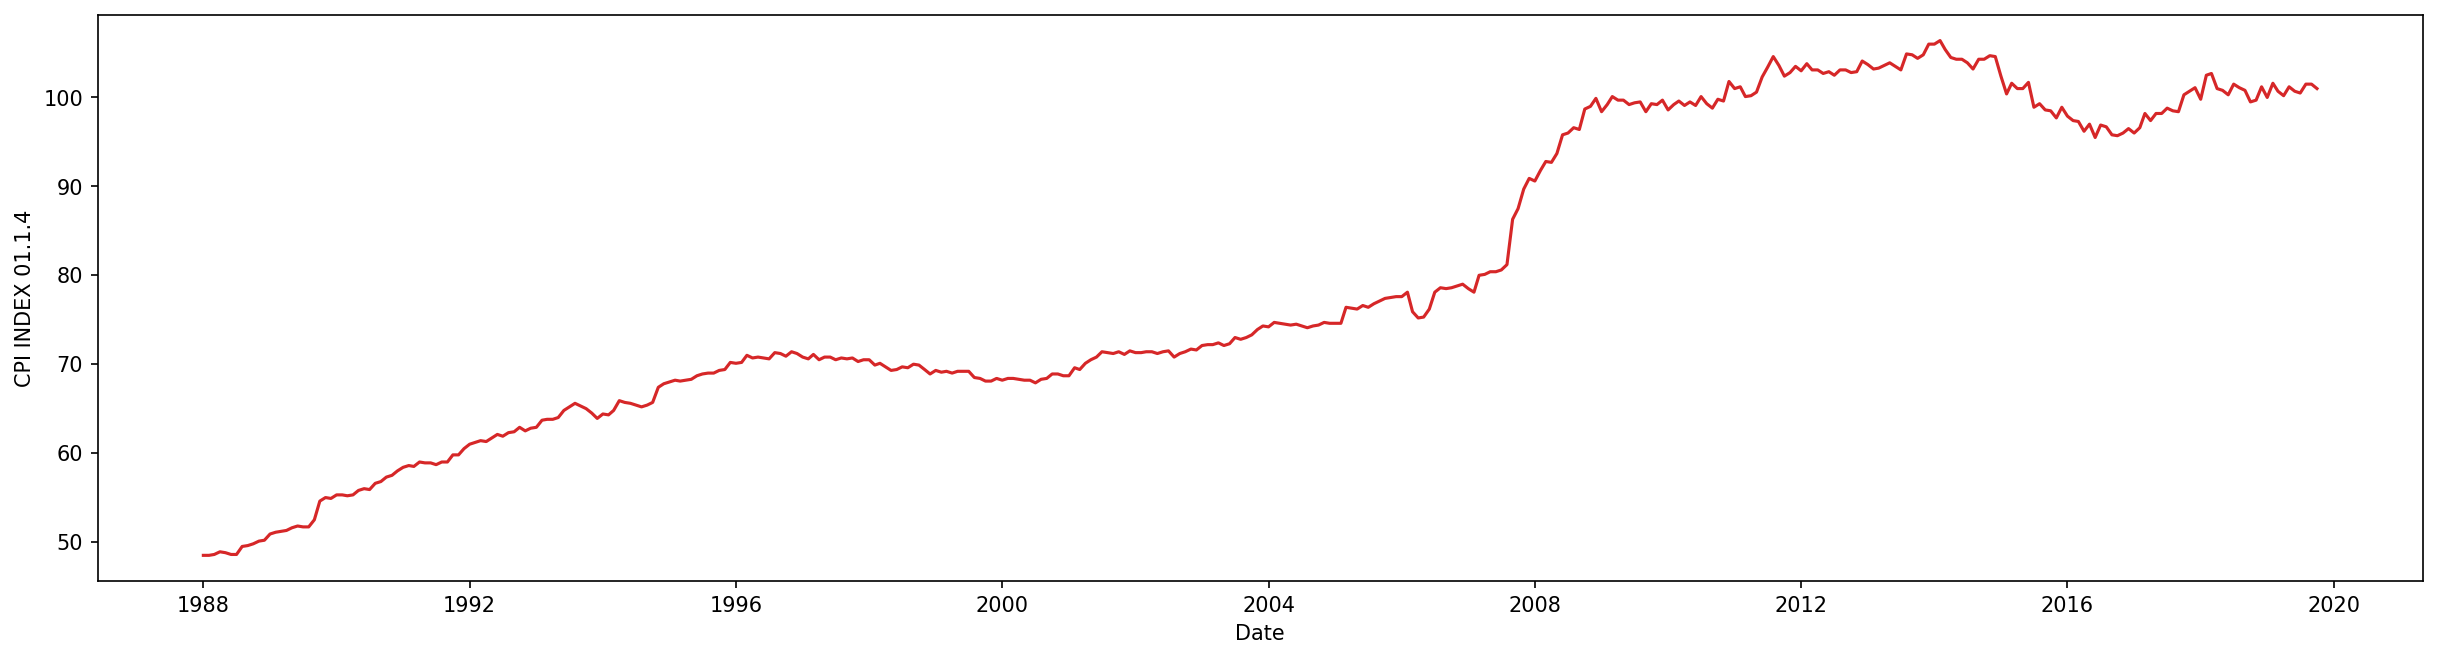

In [17]:
def plot_df(x, y, title="", xlabel='Date', ylabel='CPI INDEX 01.1.4', dpi=150):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=df2.Date, y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], title='')

Индекс потребительских цен для молочки медленно рос до 2008(начало мирового кризиса), а после этого совершил скачок на 20 пунктов и после этого наблюдаются флуктуации.

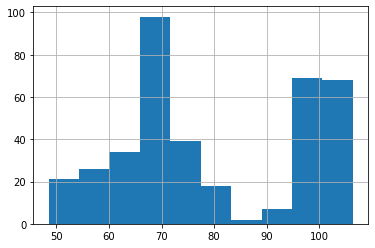

In [18]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].hist()

Гистограмма также демонстрирует бимодальность, которая разделяет моды до 2008г и после.

## Попробуем разобраться, что такое CPI? 

Индекс потребительских цен (ИПЦ, индекс инфляции, англ. Consumer Price Index, CPI) — один из видов индексов цен, созданный для измерения среднего уровня изменения цен на товары и услуги (потребительской корзины) за определённый период в экономике

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/b93c2383b8e0cd6482231324e75ffa452e1ed106")


Где: $Q^0_i$ — выпуск i-го товара в базовом году
    $P^0_i$ — цена i-го товара в базовом году
    $P^t_i$ — цена i-го товара в текущем году

# Deep learning

## MLP prediction (Многослойный перцептрон)

In [20]:
#import tensorflow as tf
#from tensorflow import keras
from numpy import array
from sklearn.metrics import mean_absolute_error, mean_squared_error
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [21]:
df2=df2.set_index('Date')

In [56]:
df4=df2[df2['Year']>2008]['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [23]:
mean=df4.mean()
std=df4.std()
normdf=df4-mean
normdf=normdf/std

In [57]:
n_steps=4
X,y=split_sequence(normdf,n_steps)

In [25]:
for i in range(0,5):
    print(X[i],'\t', y[i])

[-0.96945343 -0.65759709 -0.3067587  -0.46268687] 	 -0.4626868693409265
[-0.65759709 -0.3067587  -0.46268687 -0.46268687] 	 -0.6575970864968576
[-0.3067587  -0.46268687 -0.46268687 -0.65759709] 	 -0.579632999634484
[-0.46268687 -0.46268687 -0.65759709 -0.579633  ] 	 -0.5406509562033001
[-0.46268687 -0.65759709 -0.579633   -0.54065096] 	 -0.9694534339463461


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=False)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM,Dense, Bidirectional, Flatten,TimeDistributed
from tensorflow.keras.layers import Conv1D,ConvLSTM2D
from tensorflow.keras.layers import MaxPool1D,Dropout
#from tensorflow import set_random_seed
tf.random.set_seed(2)
from numpy.random import seed
seed(1)
model = keras.Sequential()
model.add(Dense(40, activation='relu', input_shape=(n_steps,), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(6,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.1))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])

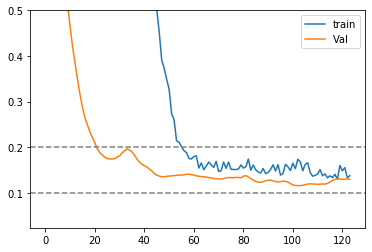

In [28]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history=model.fit(X_train, y_train, epochs=180, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Val')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

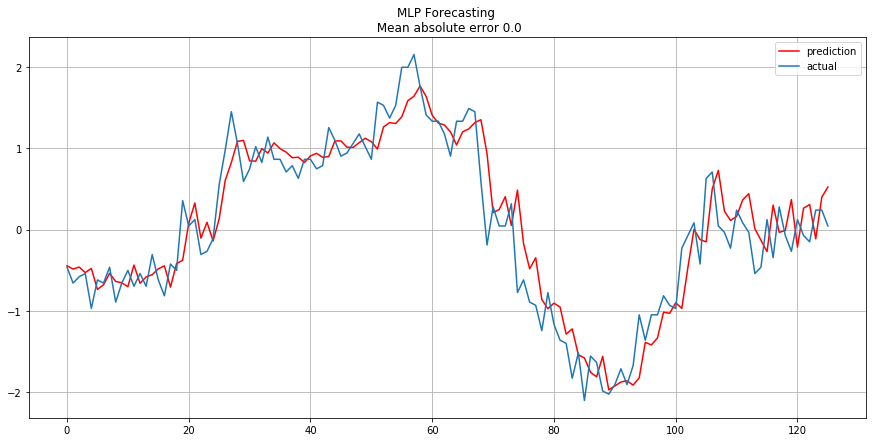

In [29]:
yhat = model.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("MLP Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## CNN Forecasting (Одномерные сверточные сети)

In [61]:
X=X.reshape((X.shape[0], X.shape[1], 1))
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=False)

In [31]:
model1 = keras.Sequential()
model1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, 1)))
model1.add(Conv1D(32, 2, activation='relu'))
#model1.add(Dropout(0.1))
model1.add(MaxPool1D())
model1.add(Flatten())
model1.add(Dense(36, activation='relu'))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

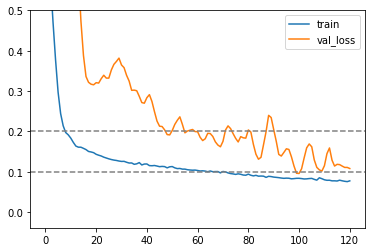

In [33]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
tf.random.set_seed(2)
seed(1)
history=model1.fit(X_train, y_train, epochs=200, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

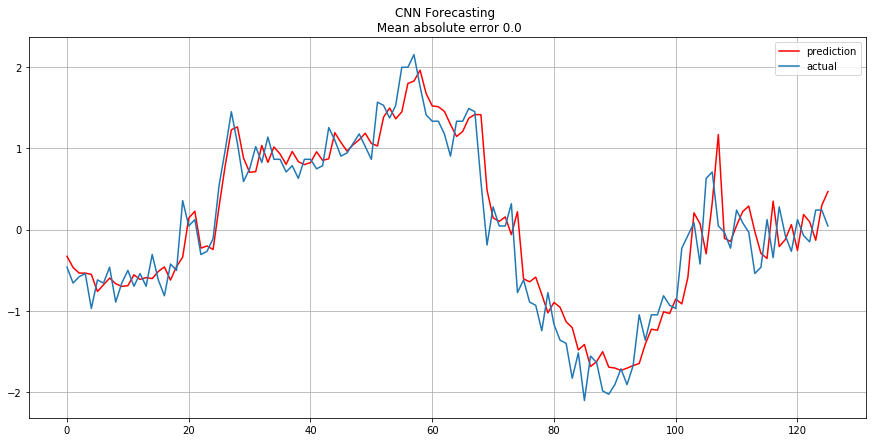

In [34]:
yhat = model1.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("CNN Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## GRU (Gated Recurrent Unit) Forecasting (Управляемые рекурентные блоки)

In [35]:
from tensorflow.keras.layers import GRU

model2 = keras.Sequential()
model2.add(GRU(32, dropout=0, recurrent_dropout=0.15, activation='relu', return_sequences=False,input_shape=(None, 1)))
model2.add(Dense(1))

model2.compile(loss='mse', optimizer=keras.optimizers.Adam())

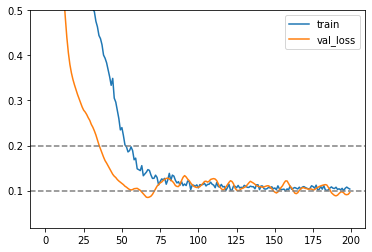

In [36]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
tf.random.set_seed(2)
seed(1)
history=model2.fit(X_train, y_train, epochs=200, 
    batch_size=50, 
    validation_split=0.2,
    #callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

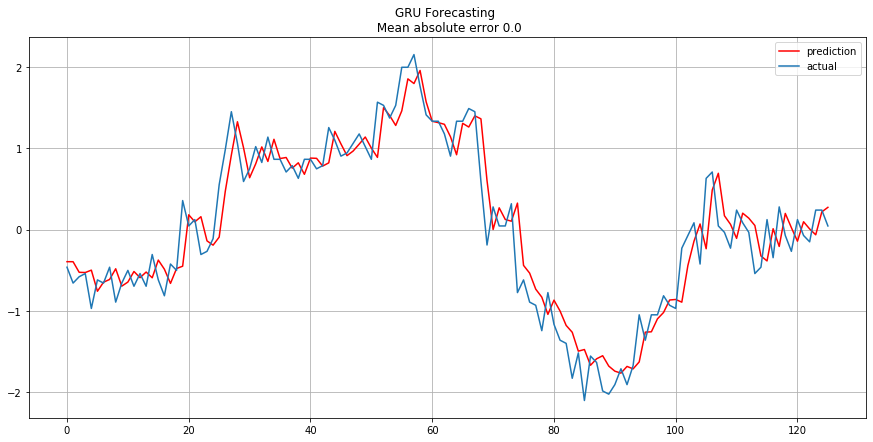

In [37]:
yhat = model2.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("GRU Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## LSTM Forecast (Long short-term memory -Долгая краткосрочная память)

In [38]:
model3 = keras.Sequential()
model3.add(LSTM(40, activation='relu',  return_sequences=False, input_shape=(n_steps, 1)))
model3.add(Dropout(0.1))
#model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mse', optimizer=keras.optimizers.Adam())

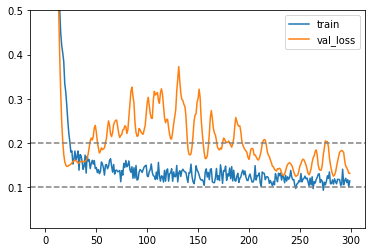

In [39]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history=model3.fit(X_train, y_train, epochs=300, 
    batch_size=32, 
    validation_split=0.2,
    #callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

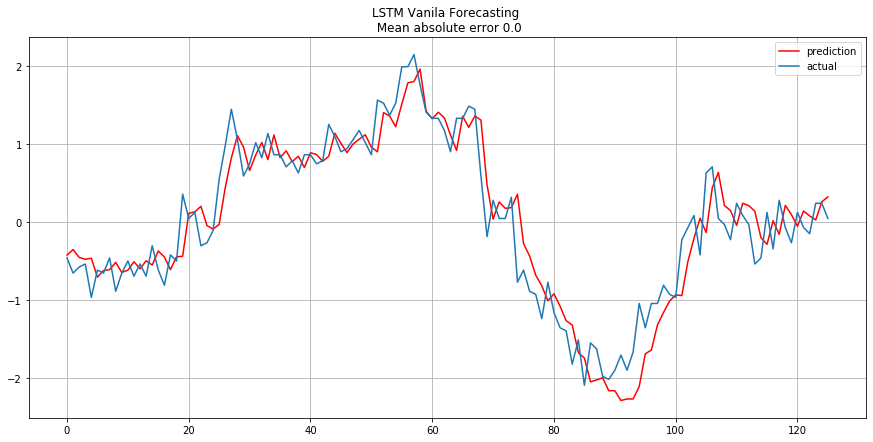

In [40]:
yhat = model3.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("LSTM Vanila Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## Bidirectional-LSTM (Двунаправленная LSTM сеть)

In [73]:
model4 = keras.Sequential()
model4.add(Bidirectional(LSTM(25, activation='relu',  return_sequences=True, input_shape=(n_steps, 1))))
model4.add(Dropout(0.1))
model4.add(LSTM(23, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(1))

model4.compile(loss='mse', optimizer=keras.optimizers.Adam())

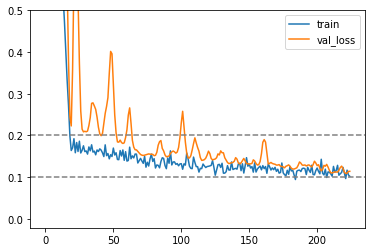

In [74]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history=model4.fit(X_train, y_train, epochs=225, 
    batch_size=32, 
    validation_split=0.2,
    #callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

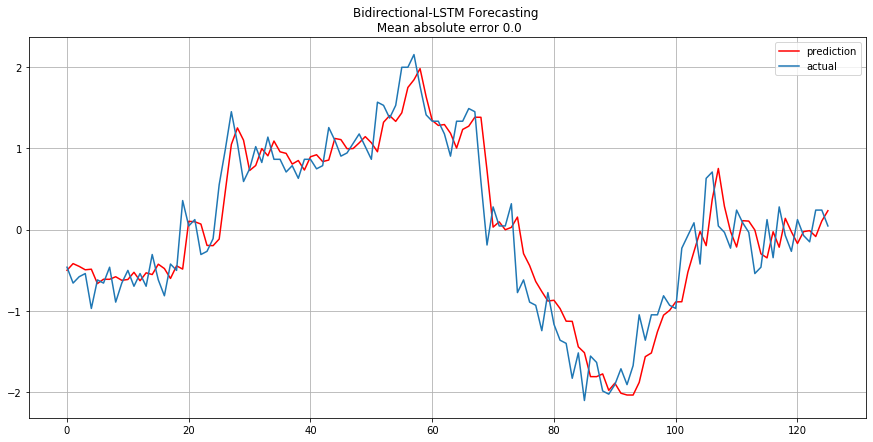

In [75]:
yhat = model4.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("Bidirectional-LSTM Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## CNN-LSTM

In [44]:
model5 = keras.Sequential()
model5.add(TimeDistributed(Conv1D(64, 1, activation='relu'), input_shape=(None, 2, 1)))

model5.add(TimeDistributed(MaxPool1D()))
model5.add(TimeDistributed(Flatten()))

model5.add(LSTM(45, activation='relu'))
model5.add(Dropout(0.15))
model5.add(Dense(1))
model5.compile(loss='mse', optimizer=keras.optimizers.Adam())

In [45]:
n_feature=1
#X=X.reshape((X.shape[0], X.shape[1], 1))
X = X.reshape((X.shape[0], 2, 2, 1))
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=False)

In [46]:
X.shape

(126, 2, 2, 1)

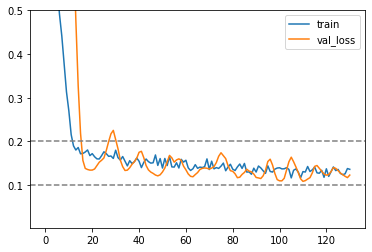

In [47]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history=model5.fit(X_train, y_train, epochs=200, 
    #batch_size=42, 
    validation_split=0.2,
    callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

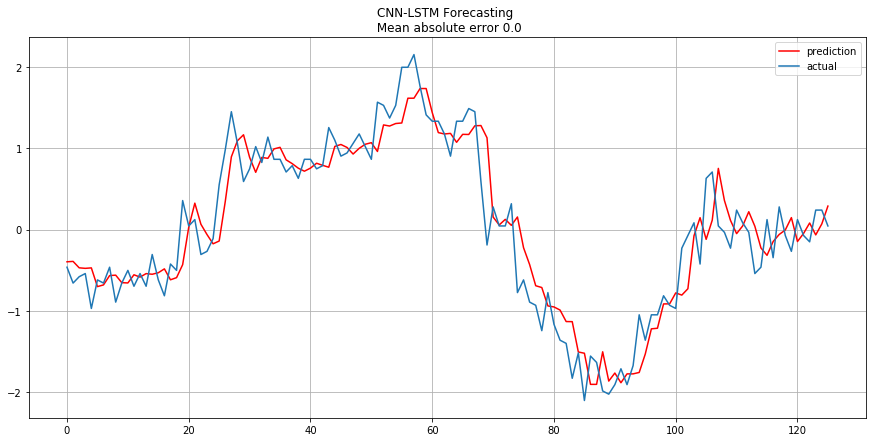

In [48]:
yhat = model5.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("CNN-LSTM Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);

## ConvLSTM

In [49]:
model6 = keras.Sequential()
model6.add(ConvLSTM2D(24, (1,2), activation='relu', input_shape=(2, 1, 2,1)))
model6.add(Dropout(0.12))
model6.add(Flatten())
model6.add(Dense(15,activation='relu'))
model6.add(Dense(1))
model6.compile(loss='mse', optimizer=keras.optimizers.Adam())

In [50]:
X = X.reshape((X.shape[0], 2, 1, 2, 1))
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=False)

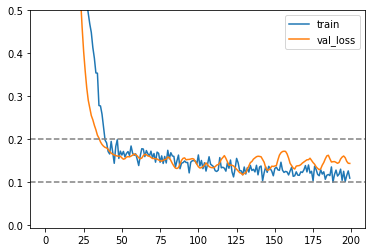

In [51]:
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
tf.random.set_seed(2)
seed(1)
history=model6.fit(X_train, y_train, epochs=200, 
    batch_size=32, 
    validation_split=0.2,
    #callbacks=[early_stop],              
    verbose=0)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.axhline(y=0.2,color='gray',linestyle='--')
plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylim(top=0.5)
plt.legend()

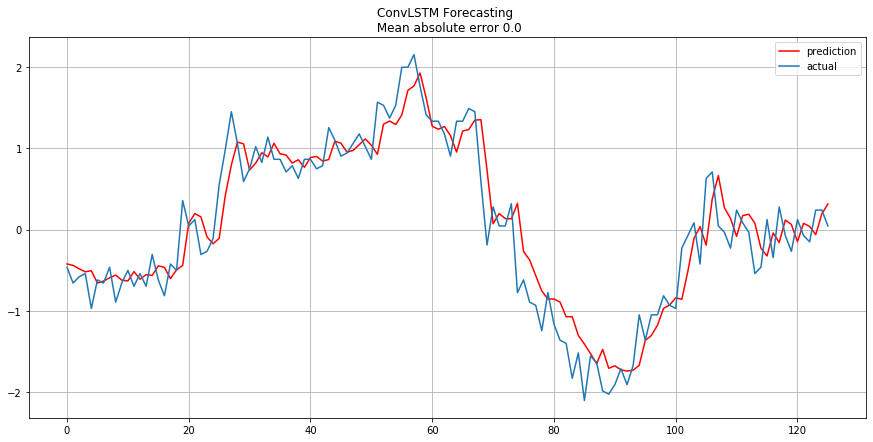

In [52]:
yhat = model6.predict(X, verbose=0)
plt.figure(figsize=(15, 7))
plt.plot(yhat, "r", label="prediction")
plt.plot(y, label="actual")
plt.legend(loc="best")
plt.title("ConvLSTM Forecasting \n Mean absolute error {}".format(round(mean_absolute_error(y,yhat))))
plt.grid(True);